## Описание

На этот раз данные имеют следующую структуру:

* записываются для каждого пользователя, совершившего покупки, каждый день
* для каждой даты есть своя папка, внутри неё – папки для каждого пользователя
* внутри каждой папки есть файл data.csv, где и хранятся данные

Схематично выглядит так:
```
└── data
   ├── 2020-12-30   
   │  ├── FirstName_LastName1   
   │  │   └── data.csv  
   │  ├── FirstName_LastName2   
   │  │   └── data.csv  
   │  └── FirstName_LastName3   
   │      └── data.csv   
   └── 2020-12-31   
      ├── FirstName_LastName1      
      │   └── data.csv      
      └── FirstName_LastName5      
          └── data.csv
```      
Например, 30 декабря три покупателя сделали покупки, 31 – два 
(папки 2020-12-30 и 2020-12-31 соответственно). Поскольку клиент FirstName_LastName1 купил товары в оба дня, для него имеется папка в папке для каждой из дат. Для других клиентов – по одной.

*Данные в задании покрывают другой временной период, имена тоже другие. Подробности, примеры и возможные подсказки можно найти в текстах следующих шагов.*

### Задание 1

Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), имя пользователя (name), и дату этих покупок (date), соответствует названию папки, где лежит папка с пользователем)

Пример итоговой таблицы:

product_id | quantity  |  name      |       date
-----------|-----------|------------|------------
0   |    56     |     2     |    Anatoly_Karpov |  2020-12-30
1   |    7     |      2    |     Anatoly_Karpov |  2020-12-30
2   |    9     |      3     |    Anatoly_Karpov  | 2020-12-30

Для объединения датафреймов, читаемых из файлов, можно использовать метод pd.concat(). Например:

1. Имеются следующие данные:

**df_1:**

product_id | quantity  |  name        |       date
---------|----------|-------------|---------------|
0   |    56     |     2    |     Anatoly_Karpov   |  2020-12-30
1    |   7      |     2      |   Anatoly_Karpov    | 2020-12-30
2   |    9     |      3     |    Anatoly_Karpov    | 2020-12-30

**df_2:**

product_id | quantity  |  name        |       date
----------|------------|-------------|-------------- 
0   |    4       |    2     |    Кatya_Skriptsova  | 2020-12-30
1    |   71     |     1     |    Кatya_Skriptsova  | 2020-12-31

2. Соединяем, передав pd.concat на вход список датафреймов, которые нужно объединить. Обратите внимание: индексы повторяются, поэтому после соединения всех данных нужно их сбросить.
```python
df = pd.concat([df_1, df_2])
```

**df:**

product_id | quantity  |  name     |           date
---------|-------------|----------|-------------------|
0    |   56      |    2      |   Anatoly_Karpov   |   2020-12-30
1    |   7       |    2      |   Anatoly_Karpov   |   2020-12-30
2    |   9     |      3    |     Anatoly_Karpov   |   2020-12-30
0   |    4     |      2    |     Кatya_Skriptsova   | 2020-12-30
1   |    71     |     1     |    Кatya_Skriptsova  |  2020-12-31

В качестве ответа укажите сумму по колонке quantity


In [1]:
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
root_path = 'D:/portfolio/da_projects/edu/python_mini_projects/3/3.1/data/'
df_list = []

for date in os.listdir(root_path):
    for name in os.listdir(root_path + date):
        if name.startswith('.'):
            continue
        file_path = f'{root_path}{date}/{name}/data.csv'
        t_df = pd.read_csv(file_path, sep = ',', index_col = 0)
        t_df['name'], t_df['date'] = name, date
        df_list.append(t_df)
df = pd.concat(df_list).reset_index().drop('index', 1)

df.head()

,product_id,quantity,name,date
0,47,1,Alexey_Smirnov,2020-12-03
1,57,1,Alexey_Smirnov,2020-12-03
2,14,2,Alexey_Smirnov,2020-12-03
3,52,1,Alexey_Smirnov,2020-12-03
4,1,4,Alexey_Smirnov,2020-12-03


### Задание 2

Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке. 

Например: *Anatoly_Karpov, Nekto_Ktotovich, Lena_Uhanova, Ignat, Sasha_Tokarev*

In [3]:
purchased_quantity = df.groupby('name')['quantity'].sum()

purchased_quantity.loc[purchased_quantity == purchased_quantity.max()]\
                .index.sort_values()


Index(['Alexey_Smirnov', 'Petr_Smirnov'], dtype='object', name='name')

Ответ: Alexey_Smirnov, Petr_Smirnov

### Задание 3

Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот (столбчатую диаграмму, sns.barplot), где:

* по оси x – идентификаторы товаров (product_id) 
* по оси y – суммарное число их покупок (сколько товаров с таким product_id было продано)

В качестве ответа укажите, сколько было продано единиц товара с product_id равным 56

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
sold = df.groupby('product_id', as_index=False)['quantity'].sum()
sold = sold.sort_values('quantity', ascending=False).head(10)
sold

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
27,34,13
66,94,13
46,66,13
65,92,12
38,50,12


<AxesSubplot:xlabel='product_id', ylabel='quantity'>

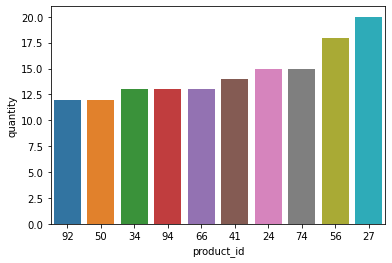

In [6]:
sns.barplot(data=sold, x='product_id', y='quantity',
            order=sold.sort_values('quantity')['product_id'])

In [7]:
sold.loc[sold['product_id'] == 56]

,product_id,quantity
42,56,18


Ответ: 18

### Задание 4

Посмотрим на продажи по дням! Для визуализации снова используйте барплот, только теперь по оси x будут дни, по которым у нас есть данные (date). Далее выберите верные утверждения:

* Максимальное число товаров было продано 4 декабря
* 5 декабря было куплено почти в три раза меньше товаров, чем в предыдущий день
* 8 и 9 декабря было продано примерно одинаковое число товаров
* Меньше всего продуктов было приобретено 4 декабря
* 4 декабря было куплено почти в два раза больше товаров, чем в предыдущий день
* Меньше всего товаров было приобретено 6 декабря
* 5 декабря было куплено почти в два раза больше товаров, чем в предыдущий день
* 7 декабря было куплено почти в два раза больше товаров, чем в предыдущий день

<AxesSubplot:xlabel='date', ylabel='quantity'>

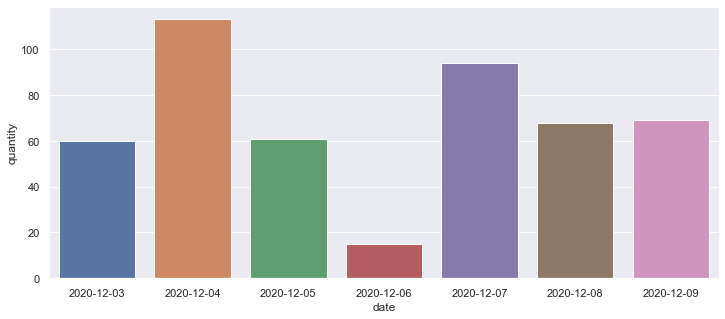

In [8]:
quantity_by_date = df.groupby('date', as_index=False) \
                     .agg({'quantity' : 'sum'}) \
                     .sort_values('quantity', ascending=False) 

sns.set(rc={'figure.figsize':(12,5)})
sns.barplot(x='date',\
            y='quantity',\
            order=['2020-12-03',\
                   '2020-12-04',\
                   '2020-12-05',\
                   '2020-12-06',\
                   '2020-12-07',\
                   '2020-12-08',\
                   '2020-12-09'],\
            data=quantity_by_date)

- Максимальное число товаров было продано 4 декабря
- 8 и 9 декабря было продано примерно одинаковое число товаров
- 4 декабря было куплено почти в два раза больше товаров, чем в предыдущий день
- Меньше всего товаров было приобретено 6 декабря

### Задание 4

Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни

*Например, пользователь Sasha Tsarev дважды приобрел товар 6. Поскольку покупка была совершена в один и тот же день, повторной в данном случае она считаться не будет. Katya Skriptsova также сделал две покупки товара 7, но в разные дни, поэтому этот случай засчитывается*
    

product_id | quantity  | name      |        date
-----------|-----------|-----------|-----------
25    |    2     |   Katya Skriptsova | 2020-12-05
54      |   1      |  Olya Silyutina   | 2020-12-05
7      |    4    |    Katya Skriptsova | 2020-12-05
6      |    4     |   Sasha Tsarev   |   2020-12-06
6     |     1     |   Sasha Tsarev    |  2020-12-06
7       |   5      |  Katya Skriptsova | 2020-12-06 

*Может пригодиться: .drop_duplicates()*

In [9]:
product = df.groupby(['name', 'product_id'])['date']\
            .nunique()\
            .sort_values(ascending=False)

product

name            product_id
Anton_Ivanov    15            2
Petr_Fedorov    94            2
Alexey_Fedorov  13            1
Petr_Smirnov    21            1
Petr_Petrov     64            1
                             ..
Anton_Smirnov   28            1
                33            1
                34            1
                40            1
Vasiliy_Petrov  78            1
Name: date, Length: 158, dtype: int64

In [10]:
product.loc[product > 1]

name          product_id
Anton_Ivanov  15            2
Petr_Fedorov  94            2
Name: date, dtype: int64

In [11]:
print(f"Ответ: {product.loc[product > 1].count()}")

Ответ: 2
